<a href="https://colab.research.google.com/github/Braelin2/ECGR5101HW4/blob/main/5105_HW4_Q2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
file_path = '/content/drive/My Drive/ECGR5105/Housing.csv'
dataset = pd.DataFrame(pd.read_csv(file_path))

In [3]:
convlist =  ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']

# Defining the map function
def binary_map(x):
    return x.map({'yes': 1, 'no': 0})

# Applying the function to the housing list
dataset[convlist] = dataset[convlist].apply(binary_map)

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

std = StandardScaler()

np.random.seed(0)
X_train_temp, X_test_temp = train_test_split(dataset, train_size = 0.8, test_size = 0.2, random_state = 100)

varlist = ['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'parking', 'prefarea']

Y_train = X_train_temp['price']
Y_test = X_test_temp['price']

num_train = len(Y_train)
num_test = len(Y_test)

X_train = np.c_[np.ones((num_train, 1)), X_train_temp[varlist]]
X_test = np.c_[np.ones((num_test, 1)), X_test_temp[varlist]]

X_train = std.fit_transform(X_train)
X_test = std.fit_transform(X_test)

In [7]:
#setting up a function for PCA reduction
def pcaRedux(x_train,x_test,k):
  pca = PCA(n_components = k)
  x_train1 = pca.fit_transform(x_train)
  x_test1 = pca.fit_transform(x_test)
  return x_train1,x_test1

In [6]:
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import mean_squared_error
from sklearn.svm import SVR
from sklearn import metrics
from sklearn.svm import SVC

# Polynomial kernel SVR
poly_svr = SVR(kernel='poly', degree=2, C=1E3)
poly_svr.fit(X_train, Y_train)
Y_prediction_poly = poly_svr.predict(X_test)

mse_poly = mean_squared_error(Y_test, Y_prediction_poly)

print(f'Polynomial Kernel MSE Loss: {mse_poly}')

# Linear kernel SVR
linear_svr = SVR(kernel='linear', C=1E3)
linear_svr.fit(X_train, Y_train)
Y_prediction_linear = linear_svr.predict(X_test)

mse_linear = mean_squared_error(Y_test, Y_prediction_linear)

print(f'Linear Kernel MSE Loss: {mse_linear}')

# RBF kernel SVR
rbf_svr = SVR(kernel='rbf', C=1E3)
rbf_svr.fit(X_train, Y_train)
Y_prediction_rbf = rbf_svr.predict(X_test)

mse_rbf = mean_squared_error(Y_test, Y_prediction_rbf)

print(f'RBF Kernel MSE Loss: {mse_rbf}')

# Sigmoid kernel SVR
sigmod_svr = SVR(kernel='sigmoid', C=1E3)
sigmod_svr.fit(X_train, Y_train)
Y_prediction_sigmoid = sigmod_svr.predict(X_test)

mse_sigmoid = mean_squared_error(Y_test, Y_prediction_sigmoid)

print(f'Sigmoid Kernel MSE Loss: {mse_sigmoid}')

Polynomial Kernel MSE Loss: 3614028333295.208
Linear Kernel MSE Loss: 2136878967470.7505
RBF Kernel MSE Loss: 3555230059536.649
Sigmoid Kernel MSE Loss: 3448214559055.742


In [8]:
#Initialize a very large dummy loss value
smallest_loss = 1000000000000000000
loss_array = []
k_vals = []

for k in range(1,12):
  x_train1, x_test1 = pcaRedux(X_train,X_test,k)
  linear_svr = SVR(kernel='linear', C=1E3)
  linear_svr.fit(x_train1,Y_train)
  y_prediction_linear = linear_svr.predict(x_test1)

  k_vals.append(k)
  loss_array.append(mean_squared_error(Y_test, y_prediction_linear))

  if(mean_squared_error(Y_test, y_prediction_linear) < smallest_loss):
    smallest_loss = mean_squared_error(Y_test, y_prediction_linear)
    best_k = k

print("Best K value is: ", best_k)
print("Smallest Loss is: ", smallest_loss)

X_train_pca, X_test_pca = pcaRedux(X_train,X_test, best_k)

# Polynomial kernel SVR
poly_svr_pca = SVR(kernel='poly', degree=2, C=1E3)
poly_svr_pca.fit(X_train_pca, Y_train)
Y_prediction_poly_pca = poly_svr_pca.predict(X_test_pca)

mse_poly_pca = mean_squared_error(Y_test, Y_prediction_poly_pca)

print(f'Polynomial MSE Loss: {mse_poly_pca}')

# Linear kernel SVR
linear_svr_pca = SVR(kernel='linear', C=1E3)
linear_svr_pca.fit(X_train_pca, Y_train)
Y_prediction_linear_pca = linear_svr_pca.predict(X_test_pca)

mse_linear_pca = mean_squared_error(Y_test, Y_prediction_linear_pca)

print(f'Linear MSE Loss: {mse_linear_pca}')

# RBF kernel SVR
rbf_svr_pca = SVR(kernel='rbf', C=1E3)
rbf_svr_pca.fit(X_train_pca, Y_train)
Y_prediction_rbf_pca = rbf_svr_pca.predict(X_test_pca)

mse_rbf_pca = mean_squared_error(Y_test, Y_prediction_rbf_pca)

print(f'RBF MSE Loss: {mse_rbf_pca}')

# Sigmoid kernel SVR
sigmod_svr_pca = SVR(kernel='sigmoid', C=1E3)
sigmod_svr_pca.fit(X_train_pca, Y_train)
Y_prediction_sigmoid_pca = sigmod_svr_pca.predict(X_test_pca)

mse_sigmoid_pca = mean_squared_error(Y_test, Y_prediction_sigmoid_pca)

print(f'Sigmoid MSE Loss: {mse_sigmoid_pca}')

Best K value is:  1
Smallest Loss is:  2099300826492.769
Polynomial MSE Loss: 3481529091125.8345
Linear MSE Loss: 2099300826492.769
RBF MSE Loss: 3419160021636.032
Sigmoid MSE Loss: 3127729267336.415


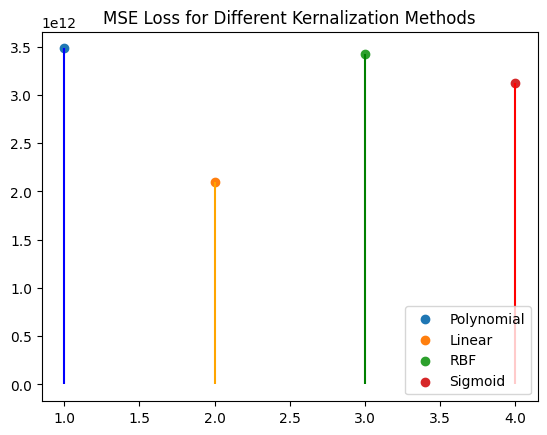

In [11]:
#Plotting MSE for different kernalization
plt.scatter(1, mse_poly_pca , label = 'Polynomial')
plt.scatter(2, mse_linear_pca , label = 'Linear')
plt.scatter(3, mse_rbf_pca , label = 'RBF')
plt.scatter(4, mse_sigmoid_pca, label = 'Sigmoid')

line_colors = ['blue', 'orange', 'green', 'red']

# Add vertical lines
for x, y, color in zip([1, 2, 3, 4], [mse_poly_pca, mse_linear_pca, mse_rbf_pca, mse_sigmoid_pca], line_colors):
    plt.vlines(x, 0, y, colors=color, linestyles='-', alpha=1)

plt.legend(loc = 'lower right')
plt.title("MSE Loss for Different Kernalization Methods")
plt.show()